In [7]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import image
from matplotlib import pyplot as plt
import joblib

def load_file(datapath):
    with open(datapath, 'rb') as file:
        data = joblib.load(file)
        file.close()
    return data

resultdir = 'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/QRF Inference/2023-12-5_8.54/'
resultpath = os.path.join(resultdir, os.path.basename(os.path.normpath(resultdir)) + '.json')
inferencedatapath = 'C:/Users/ushe/Documents/LinuxDownload/mb_8_multi_stations_LCZ_xy_N02.00m_palmhumi.json'
palmfile = os.path.basename(inferencedatapath).split('_palmhumi')[0]

# DATA
results = load_file(resultpath)
inferencedata = load_file(inferencedatapath)
palmboundary = load_file(f'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/PALM/{palmfile}_boundary.z')


# FEATURES
spatial_features = ['altitude', 'buildings', 'forests', 'pavedsurfaces', 'surfacewater', 'urbangreen']

# Geofeature Analysis
Geofeatures aren't loaded properly, when plotting the generated features, we get uniform maps which do not correspond to the original `.tif` files. The original inference geofeatures are plotted below (convolutions excluded) and subsequently the original maps from the `.tif` files.

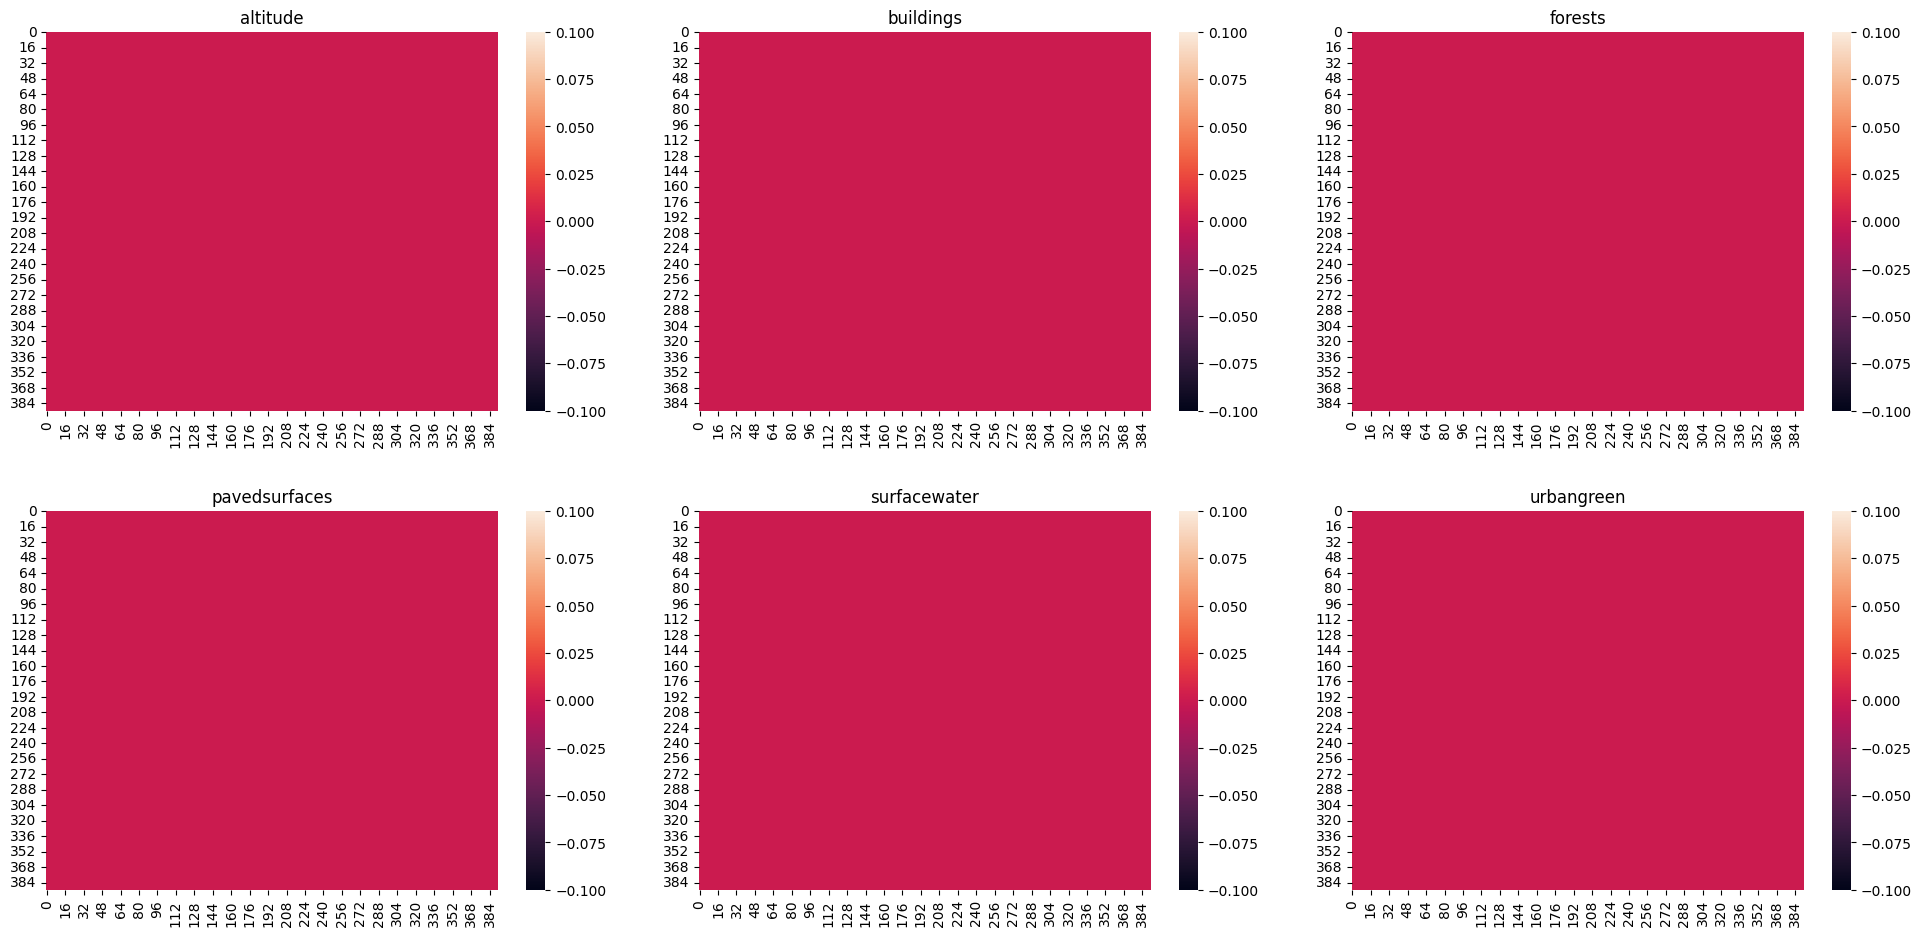

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))
for i, feature in enumerate(spatial_features):
    ax = sns.heatmap(inferencedata[feature][0, :, :], ax=axs[i//3, i%3])
    ax.set_title(feature)
fig.tight_layout(pad=3.0)

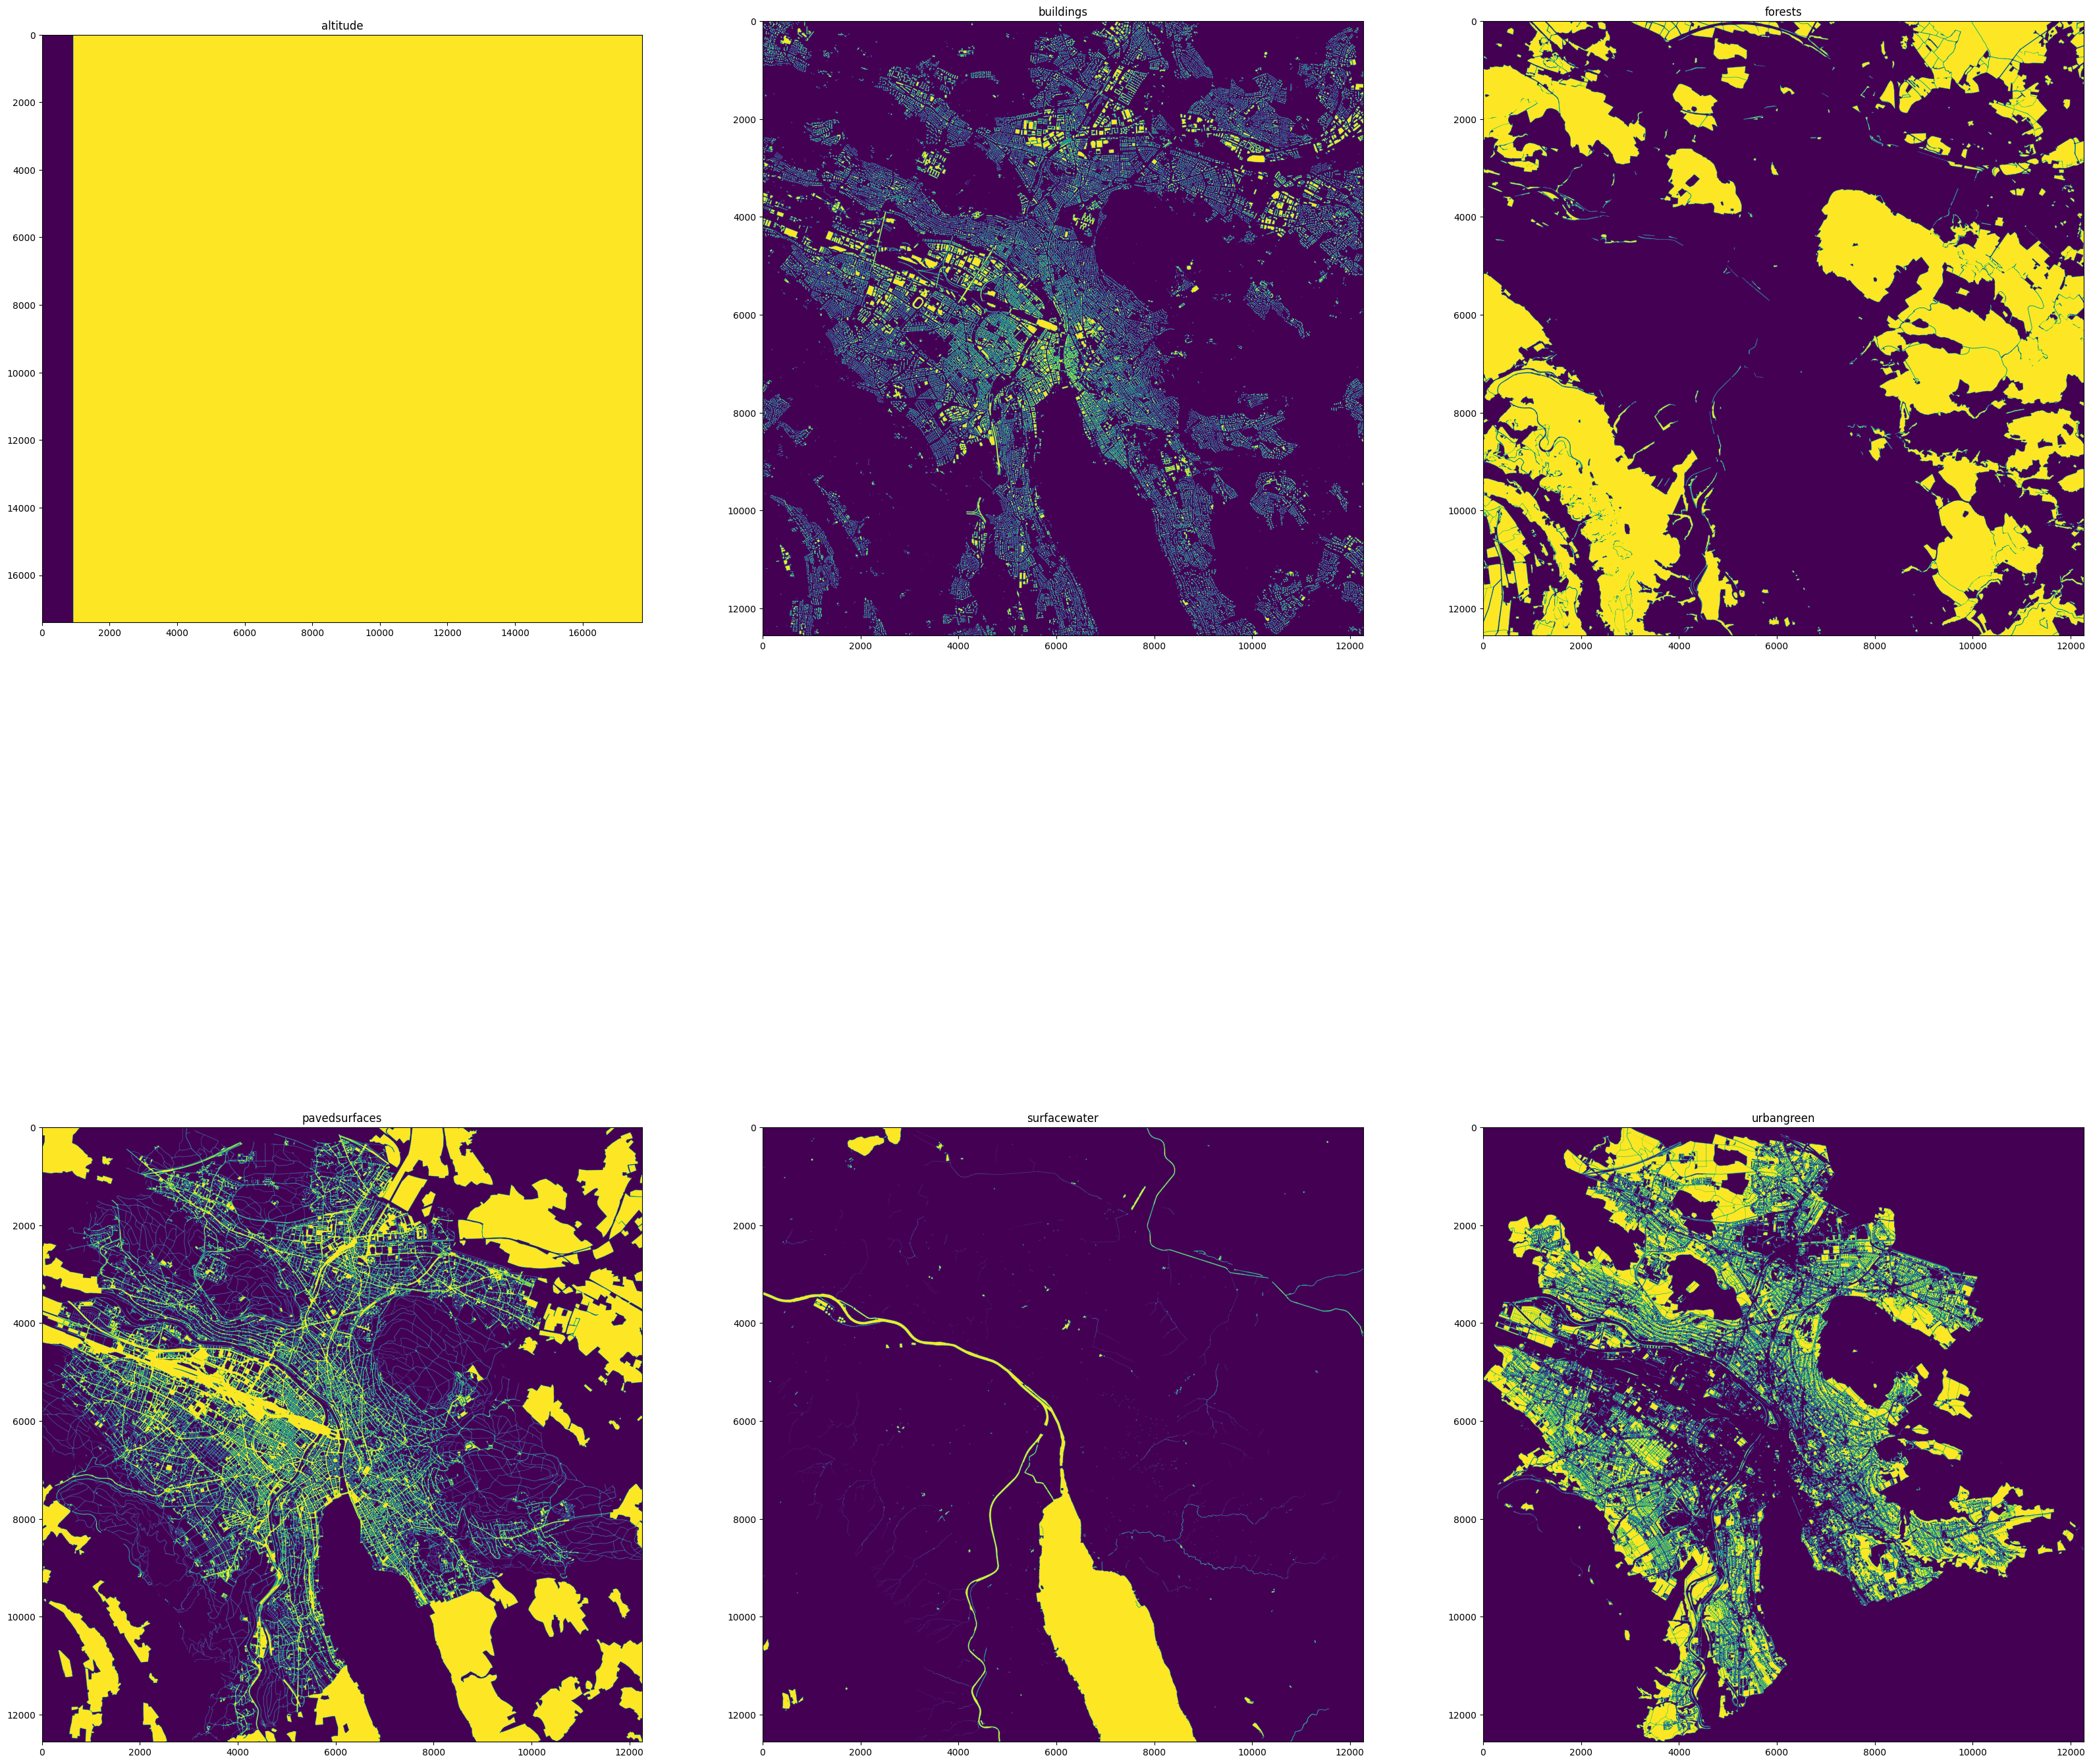

In [6]:
import os
import rasterio
geopath = 'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/geodata'
fig, axs = plt.subplots(2, 3, figsize=(40,40))
for i, feature in enumerate(spatial_features):
    path = os.path.join(geopath, f'{feature}.tif')
    feaeture_raster = rasterio.open(path)
    axs[i//3, i%3].imshow(feaeture_raster.read()[0, :, :])
    axs[i//3, i%3].set_title(feature)


Altitude is incorrect, upon analysing the maximum and minimum values, it 

In [36]:
altitude_origin = rasterio.open(os.path.join(geopath, 'altitude.tif')).read()

min altitude: 380.6220703125
max altitude: 872.0078735351562


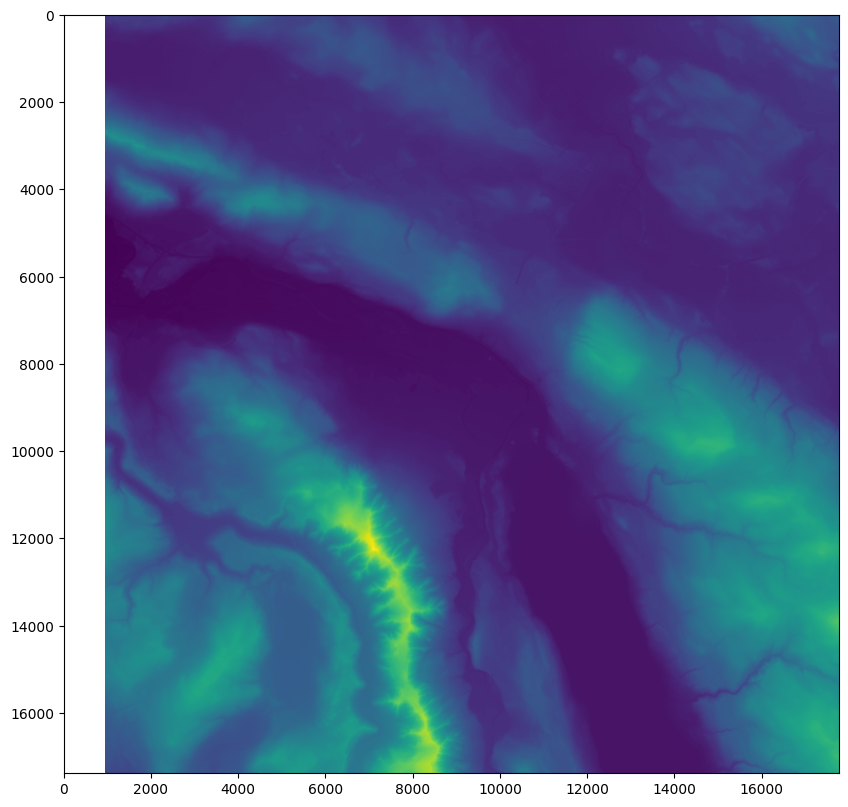

In [26]:
altitude = rasterio.open(os.path.join(geopath, 'altitude.tif')).read()[0, :, :]
altitude[altitude < 0] = np.nan
print(f'min altitude: {np.nanmin(altitude)}')
print(f'max altitude: {np.nanmax(altitude)}')
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(altitude)

There is a small band of the altitude `.tif` where no data is available, which has a very small negative value rather than nan or 0, so by replacing these missing values with nan, we can see the altitude details. 

With regards to the missing geofeature data in the inference feature maps, it is most likely that an error ocurred during the loading of these maps and calculation of their convolutions. The function `generate_geomap` from the `feature_generation.py` script was reworked and the resulting geofeatures ...